<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Detection

## IMPORTS

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Download image from internet

In [ ]:
!wget 'https://imgs.search.brave.com/K2bkeZSMiN9_rR01glWUlogRGtgYmPN57L2H6A7MSi8/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly9iYWdz/aW5idWxrLmNvbS9j/ZG4vc2hvcC9maWxl/cy9TUzczNzdfODUw/YjIzYmEtZDJiYS00/NzQ3LWEyOTEtMDVm/NTE5NzdmYjQzXzcw/MHg3MDAuanBnP3Y9/MTY4OTI1NzczMA' -O /content/line.jpg

Read the image

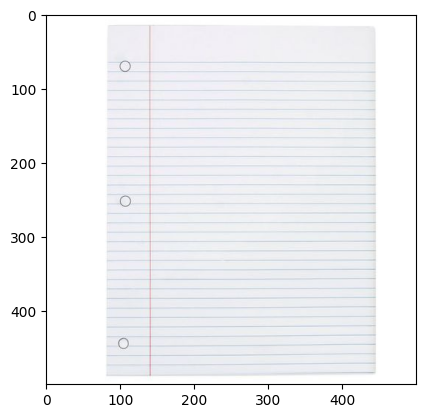

In [24]:
image = cv.imread('/content/line.jpg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

Convert to Grayscale

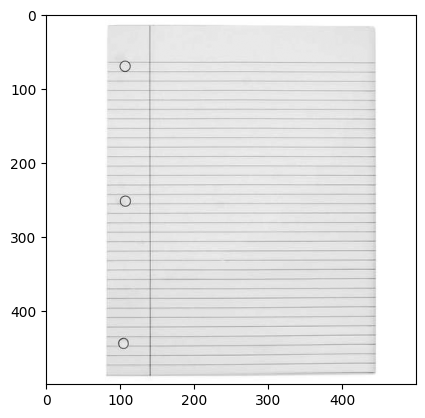

In [26]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Edge Detection using Canny

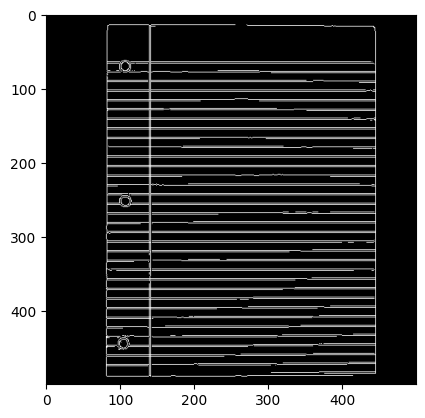

In [31]:
canny = cv.Canny(gray, 50, 100)
plt.imshow(canny, cmap='gray')

Detect Lines using Hough Transform

In [32]:
lines = cv.HoughLinesP(canny,
                        rho=1,
                        theta=np.pi/180,
                        threshold=100,
                        minLineLength=50,
                        maxLineGap=10)

line_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

Display the result

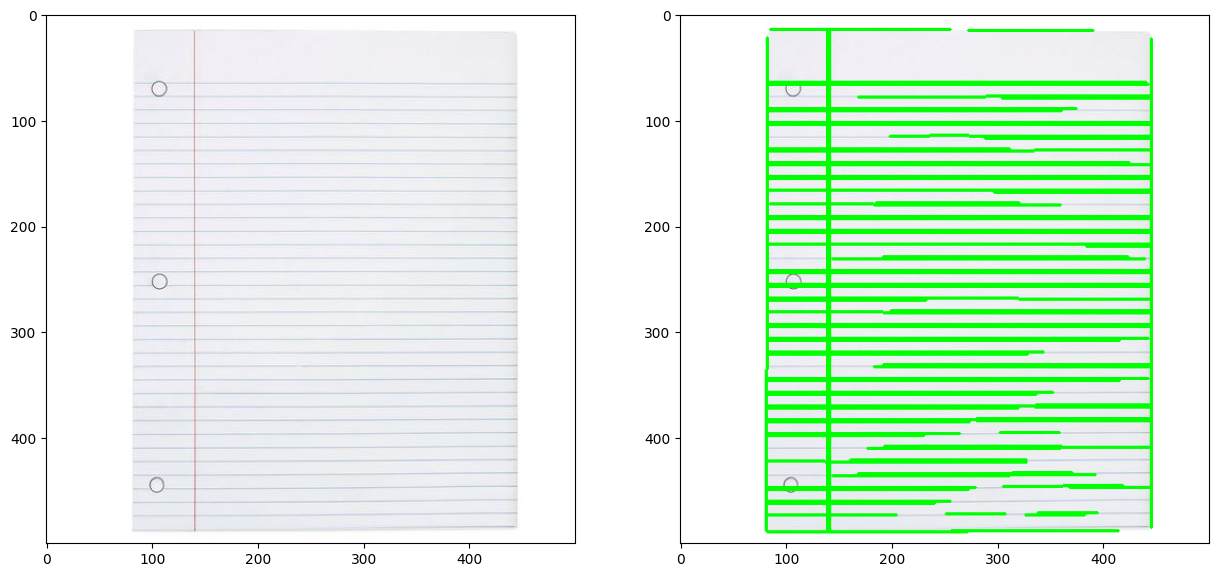

In [33]:
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(line_image, cv.COLOR_BGR2RGB))